# Lab 4 -- Image Processing


# Work done by:

- Adam Lahbib
- M. Sofiene Barka
- Mohamed Rafraf

RT 4 -- #1 in Queue 

# I. Load the cell image
In this tutorial we will try to manipulate the image of cells that we have already used in a previous tutorial.
We will first import the libraries that will be useful to us

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow, get_cmap
#from skimage import data
from PIL import Image, ImageDraw

# Question : 
Import the image and make sure it is in grayscale, then display it.

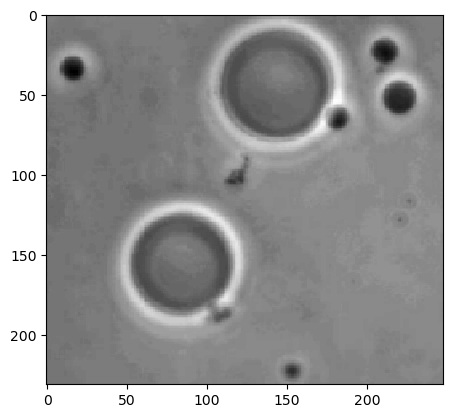

In [72]:
img = cv2.imread('cell_image.png',0) # 0 for greyscale
plt.imshow(img, cmap=get_cmap('gray')) # display image
plt.show()

# II. Display of the amplitude spectrum

# Question 1
Use numpy's fft.fft2() function to retrieve the image data in the frequency domain.

The '2' in fft2() indicates that we are using the 2-dimensional Fourier transform. Its first argument is the input image, which is in grayscale. The second argument is optional and decides the size of the output array.

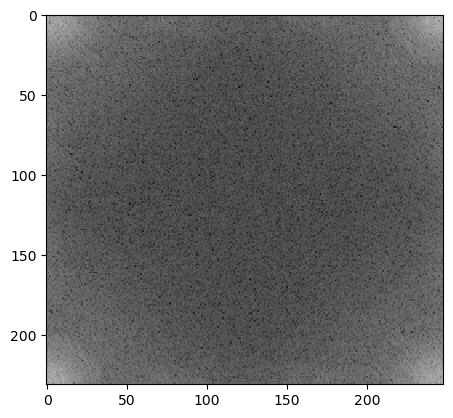

In [44]:
f = np.fft.fft2(img) # f is the fourier transform of the image
plt.imshow(np.log(np.abs(f)), cmap=get_cmap('gray'))
plt.show()

# Question 2
If you try to display the image, it will not work, why?

*After applying fft.fft2() to an image, you will obtain a complex-valued array representing the image in the frequency domain. The real part of each element in this array represents the amplitude of the corresponding frequency component, and the imaginary part represents the phase.*

*However, directly visualizing this complex-valued array as an image will not work because typical image display methods expect the pixel values to be real numbers in a certain range (e.g., 0 to 255 for grayscale images).*

# Question 3
Center the data around 0 by applying the fft.fftshift() function on the frequencies.

In [45]:
fshift = np.fft.fftshift(f) # shift the zero-frequency component to the center of the spectrum

# Question 4
Calculate the magnitude spectrum. 
Display the original image and its magnitude spectrum (in shades of gray).

The magnitude spectrum is given by the following formula:
magnitude_spectrum = 20*np.log(np.abs(shifted_freq))

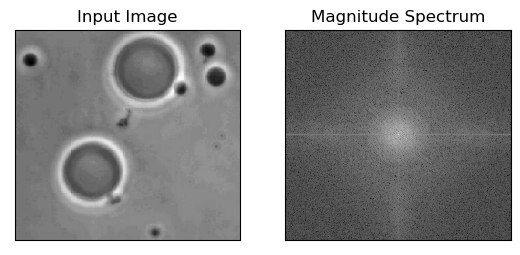

In [46]:
magnitude_spectrum = 20*np.log(np.abs(fshift)) # get the magnitude spectrum

plt.subplot(121),plt.imshow(img, cmap=get_cmap('gray')) # original image
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap=get_cmap('gray')) # magnitude spectrum
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# III. Frequential Filtering: High Pass Filter
We can now perform some operations in the frequency domain, such as high-pass filtering and reconstruct the image after filtering using the inverse Fourier Transform.

1. Remove the low frequencies by masking with a rectangular window of size 20x20. 
2. Apply the inverse shift using ifftshift() (in other words, reverse the operation that centered the data around 0). 
3. Calculate the inverse FFT using the ifft2() function. The result, again, will be a complex number. 
4. Display the absolute value of the result.

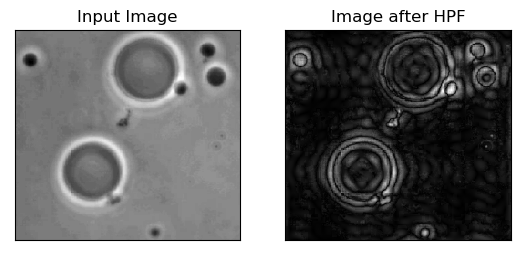

In [47]:
# applying mask 20x20
mask_size = 20
rows, cols = img.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones_like(img)
mask[center_row - mask_size // 2: center_row + mask_size // 2, center_col - mask_size // 2: center_col + mask_size // 2] = 0
filtered_image = img * mask

# apply mask and inverse DFT
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap=get_cmap('gray'))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap=get_cmap('gray'))
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

# IV. Frequential Fitlering: Low pass filter
As explained in class, a low-pass filter is the complement of a high-pass filter. 
We will start by applying a rectangular low-pass filter.

# Question 1
1. Start by creating an image of 0s (or 1 but you'll have to do the complementary later) of the size of your cell image. 
2. Set a rectangular window (in the center of the image) to 1 with a side measuring 20 pixels 
3. Display the mask

In [48]:
mask = np.zeros_like(img)

In [49]:
mask[center_row - mask_size // 2: center_row + mask_size // 2, center_col - mask_size // 2: center_col + mask_size // 2] = 1

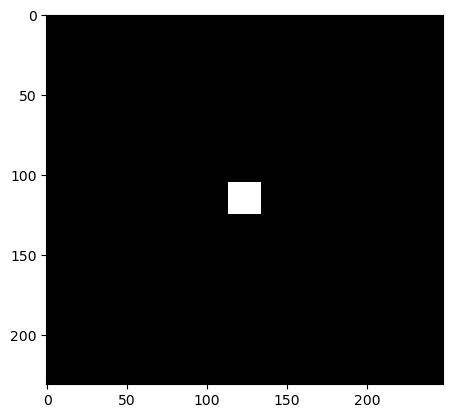

In [50]:
mask = mask * 255
plt.imshow(mask, cmap=get_cmap('gray'))
plt.show()


# Question 2
1. Apply this filter to the image spectrum 
2. Find as done previously the image filtered by Inverse Fourier Transform.
3. What do you notice about the result, besides the fact that the output image is strongly smoothed?

In [70]:
fshfit = fshift * mask

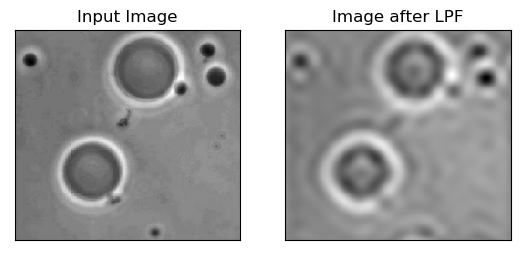

In [85]:
shift_freq=np.fft.fftshift(f)
LP_filter_rect = np.multiply(shift_freq, mask)
LP_result_rect = np.fft.ifft2(np.fft.ifftshift(LP_filter_rect))
LP_result_rect = np.abs(LP_result_rect)


plt.subplot(121),plt.imshow(img, cmap=get_cmap('gray'))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(LP_result_rect, cmap=get_cmap('gray'))
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.show()

Comments:
*The low-pass filter is used to smooth high frequencies and minimize the appearance of edges in an image. In our case, the filter has a rectangular shape, which results in the presence of rectangular forms in the filtered image. Additionally, there is a 90-degree shift between the frequency domain and the spatial domain, so the rectangular shapes of the filter appearing in the image also undergo a 90-degree rotation. The smoothing effect is too strong; therefore, it would be necessary to increase the mask window size to include more high frequencies and achieve a less pronounced smoothing effect.*

# Question 3
We will now create a circular low-pass filter. 
1. Execute the code below 
2. Display the original image and the resulting image of the filter.
3. Comment the result by comparing the rectangular and circular pass-down filter.

Here is the corresponding code:

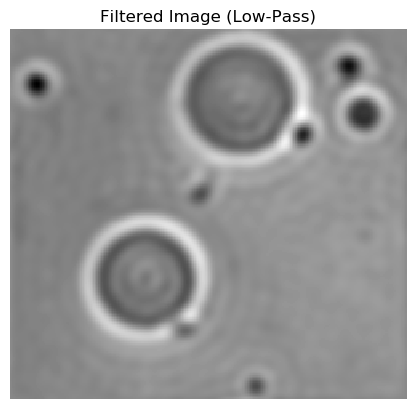

In [84]:
grayimg = cv2.imread('./cell_image.png', cv2.IMREAD_GRAYSCALE)

#Créer un filtre passe bas non rectangulaire, mais circulaire
x,y = grayimg.shape[0],grayimg.shape[1]
#size of circle
e_x,e_y=40,40

#Donnez les paramètres de l'ellipse (cercle) que vous souhaitez créer

#Attention: le repère de l'image et d'une figure sont différents : (x,y) devient (y,x)!!!
bbox=((y/2)-(e_y/2),(x/2)-(e_x/2),(y/2)+(e_y/2),(x/2)+(e_x/2))

#Créer l'image noire initiale du masque
low_pass=Image.new("L",(y,x),color=0) #L : single channel mode

#Ajoutez le cercle et le remplir par des 1s
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)
#Affichez votre image correspondant au masque
imshow(low_pass, cmap=get_cmap('gray'))

#multipliez les 2 images
shift_freq = np.fft.fftshift(f)
LP_filter= np.multiply(shift_freq,low_pass)

#Undo le décalage du spectre et appliquez ifft2
LP_result= np.fft.ifft2(np.fft.ifftshift(LP_filter))
LP_result= np.abs(LP_result)

# Display the filtered image using plt.imshow()
plt.imshow(LP_result, cmap='gray')
plt.axis('off')
plt.title('Filtered Image (Low-Pass)')
plt.show()

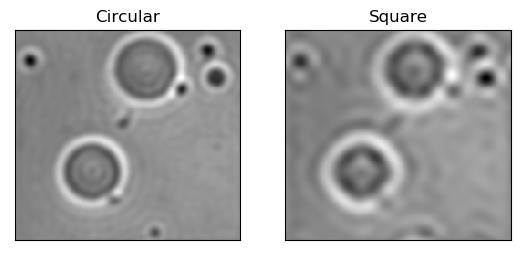

In [86]:
plt.subplot(121),plt.imshow(LP_result, cmap=get_cmap('gray'))
plt.title('Circular'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(LP_result_rect, cmap=get_cmap('gray'))
plt.title('Square'), plt.xticks([]), plt.yticks([])
plt.show()

Your comment: 
*The circular low pass filter tends to provide a smoother and more gradual reduction in high-frequency components. It preserves more of the low-frequency information while attenuating higher frequencies. This smoothness is due to the circular shape of the filter's frequency response, which allows for a gradual transition between preserved and attenuated frequencies.*

*On the other hand, the square low pass filter has a sharper cutoff in its frequency response. It results in a more abrupt reduction of high-frequency components, leading to a less smooth transition between preserved and attenuated frequencies.*

# V. Edge Detection

Now, our goal is to detect cell contours by attempting to apply the Sobel and Canny operators.

1. First, apply a Gaussian blur with a size of 3x3 using the function cv2.GaussianBlur(...).
2. Apply the Sobel filter along the x-axis, along the y-axis, and then in both directions simultaneously. Choose appropriate parameters for the cv2.Sobel() function.
3. Display the results of Sobel_x and Sobel_y.
4. Apply the Canny method using cv2.Canny(...). Adjust the two hysteresis thresholds until you achieve the best result according to your judgment.
5. Display the final result of Sobel (in both directions and after thresholding) and the final result of Canny.
6. Compare the results.


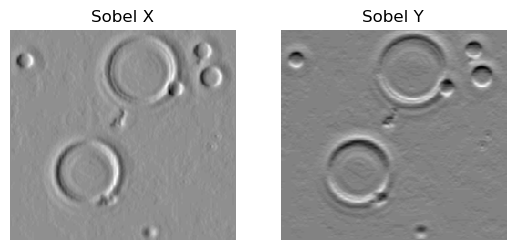

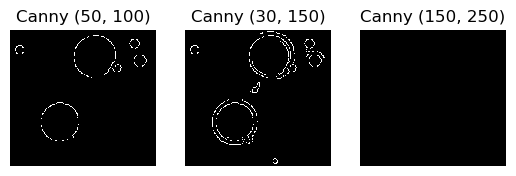

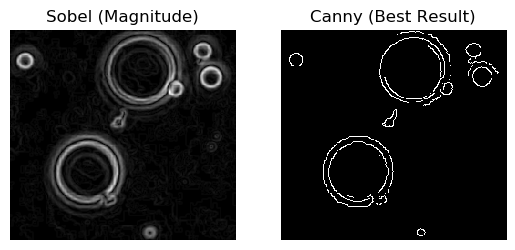

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image
gray_img = cv2.imread('./cell_image.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur with a kernel size of 3x3
blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Apply Sobel filter in x and y directions
sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

# Display the results of Sobel in x and y directions
plt.subplot(1, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

# Apply Canny edge detection with different thresholds
canny_img1 = cv2.Canny(blurred_img, 50, 100)
canny_img2 = cv2.Canny(blurred_img, 30, 60)
canny_img3 = cv2.Canny(blurred_img, 150, 250)

# Display the results of Canny edge detection
plt.subplot(1, 3, 1)
plt.imshow(canny_img1, cmap='gray')
plt.title('Canny (50, 100)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(canny_img2, cmap='gray')
plt.title('Canny (30, 150)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_img3, cmap='gray')
plt.title('Canny (150, 250)')
plt.axis('off')

plt.show()

# Display the final results of Sobel and Canny
plt.subplot(1, 2, 1)
plt.imshow(np.sqrt(sobel_x**2 + sobel_y**2), cmap='gray')
plt.title('Sobel (Magnitude)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_img2, cmap='gray')
plt.title('Canny (Best Result)')
plt.axis('off')

plt.show()


Your comments: 
*The Canny edge detection algorithm is known for accurately finding edges while reducing noise. We tested how different parameter settings affect edge detection sensitivity and continuity. We also examined the impact of changing the aperture size on image smoothing before edge detection. In contrast, the Sobel method detects edges by calculating gradients in the image. We investigated how parameters like kernel size and scale factor affect edge detection for different orientations and strengths. We also looked at the effect of varying threshold values on edge detection. By comparing the results of Canny and Sobel methods with different parameter settings, we evaluated their accuracy, noise tolerance, and efficiency. We visually analyzed the output images to check if important details were preserved and false edges were suppressed.*